#Motion Planning of Articulated Robot Arm (Fetch Robot) using Reinforcement Learning
We use the OpenAI Gym "FetchReach-v1" environment to sample trajectories and training data from.
The objective is to control Fetch's end effector to reach that goal as quickly as possible. The goal position is randomly chosen in 3D space in every episode.

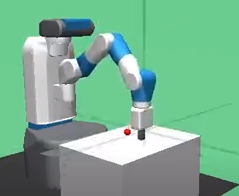
[![Environment Training Video](https://drive.google.com/file/d/1NyNlSuiayoMcPZv9YbOP_mbtdmNM7o8u/view?usp=sharing)](https://drive.google.com/file/d/1-LjWq-tYPlYKe-gG9uQQZ3FTElFUqs28/view?usp=sharing)

##Package Installations

In [1]:
!nvidia-smi

Tue Nov 23 10:14:55 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!apt-get install -y \
    libgl1-mesa-dev \
    libgl1-mesa-glx \
    libglew-dev \
    libosmesa6-dev \
    software-properties-common

!apt-get install -y patchelf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgl1-mesa-dev is already the newest version (20.0.8-0ubuntu1~18.04.1).
libgl1-mesa-dev set to manually installed.
software-properties-common is already the newest version (0.96.24.32.14).
Suggested packages:
  glew-utils
The following NEW packages will be installed:
  libgl1-mesa-glx libglew-dev libglew2.0 libosmesa6 libosmesa6-dev
0 upgraded, 5 newly installed, 0 to remove and 37 not upgraded.
Need to get 2,916 kB of archives.
After this operation, 12.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgl1-mesa-glx amd64 20.0.8-0ubuntu1~18.04.1 [5,532 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libglew2.0 amd64 2.0.0-5 [140 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libglew-dev amd64 2.0.0-5 [120 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libosmesa6 amd64 20.0.8-

In [3]:
!pip install gym

In [4]:
!pip install free-mujoco-py

     |████████████████████████████████| 14.1 MB 2.5 MB/s 
     |████████████████████████████████| 3.3 MB 14.8 MB/s 
     |████████████████████████████████| 15.7 MB 43.2 MB/s 
     |████████████████████████████████| 203 kB 52.8 MB/s 
     |████████████████████████████████| 3.1 MB 58.9 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21

Restart Runtime Here To Incorporate the New Installed Packages

In [5]:
pip install tensorflow==1.15 #######version differ plz install tensorflow 1.x

     |████████████████████████████████| 412.3 MB 21 kB/s 
     |████████████████████████████████| 3.8 MB 51.3 MB/s 
     |████████████████████████████████| 503 kB 52.4 MB/s 
     |████████████████████████████████| 50 kB 6.5 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=60d74593cbb7d3c069264d405f0098cc054464ade6518a5033b9033e730a6411
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

Restart Runtime Here To Incorporate the New Installed Packages

In [6]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

In [ ]:
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
#!pip install gym[robotics] > /dev/null 2>&1

     |████████████████████████████████| 952 kB 2.7 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.6 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


##Rendering Environment

Functions used to show the video by adding it to the Colab notebook.

In [1]:
import gym
from gym.wrappers import Monitor
import glob
import io
import base64
from IPython.display import HTML
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay

display = Display(visible=0, size=(400, 200))
display.start()

"""
Utility functions to enable video recording of gym environment 
and displaying it.
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 800px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [23]:
#env = wrap_env(gym.make("MountainCar-v0"))
env = wrap_env(gym.make("FetchReach-v1"))

observation = env.reset()

while True:
  
    env.render()
    
    #your agent goes here
    action = env.action_space.sample() 
         
    observation, reward, done, info = env.step(action) 
   
        
    if done: 
      break;
            
env.close()
show_video()

Creating window glfw


##Import Dependencies

In [2]:
import mujoco_py
import gym
import numpy as np
import tensorflow as tf
import tensorflow.contrib as tc
from collections import deque
import random
import matplotlib.pyplot as plt

Compiling /usr/local/lib/python3.7/dist-packages/mujoco_py/cymj.pyx because it changed.
[1/1] Cythonizing /usr/local/lib/python3.7/dist-packages/mujoco_py/cymj.pyx
running build_ext
building 'mujoco_py.cymj' extension
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr/local
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr/local/lib
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuexten

##Environment And Hyperparameter Definition

In [3]:
env = gym.make('FetchReach-v1')
action_size = 4
state_size = 13
action_bound = env.action_space.high
batch_size = 128

In [4]:
#########seeding for reproducible results##########
seeding = 1234
np.random.seed(seeding)
tf.set_random_seed(seeding)
env.seed(seeding)

[1234]

##Actor Class

In [5]:
class actor():
    def __init__(self, state_size, action_size, action_bound, sess, ac_lr = 0.0001, tau = 0.001):
        self.state_size = state_size
        self.action_size = action_size
        self.action_bound = action_bound
        self.sess = sess
        self.lr = ac_lr
        self.batch_size = 128
        self.tau = tau
        #self.input = tf.placeholder(tf.float32, [None, self.state_size], name = "State_actor_input")
        #self.target_input = tf.placeholder(tf.float32, [None, self.state_size], name = "State_target_actor_input")

        with tf.variable_scope('actor_net'):

            self.input_actor, self.out_, self.scaled_out = self.actor_model()

        self.ac_params = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='actor_net')


        with tf.variable_scope('actor_target_net'):
            self.input_target_actor, self.target_out_, self.target_scaled_out = self.actor_model()

        self.ac_target_pram = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope = 'actor_target_net')
        #print(len(self.ac_params))


        self.update_target_in = [self.ac_target_pram[i].assign ( tf.multiply(self.ac_target_pram[i], 0) + tf.multiply(self.ac_params[i],1) ) for i in range(len(self.ac_target_pram))]
        self.update_target = [self.ac_target_pram[i].assign ( tf.multiply(self.ac_target_pram[i], 1-self.tau) + tf.multiply(self.ac_params[i],self.tau) ) for i in range(len(self.ac_target_pram))]


        self.critic_grad = tf.placeholder(tf.float32,[None, self.action_size], name = 'critic_grad')

        self.actor_grad = tf.gradients(self.scaled_out, self.ac_params, -self.critic_grad)
        self.actor_gradients = list(map(lambda x: tf.div(x, self.batch_size), self.actor_grad))

        self.loss = tf.train.AdamOptimizer(self.lr).apply_gradients(zip(self.actor_gradients, self.ac_params))

    def actor_model(self):
        inputs = tf.placeholder(tf.float32, [None, self.state_size])
        x = tc.layers.layer_norm(inputs, center=True, scale=True, begin_norm_axis=0)
        h1 =  tf.layers.dense(x, 400, activation = tf.nn.relu )
        h1 = tc.layers.layer_norm(h1, center=True, scale=True)
        h2 = tf.layers.dense(h1, 300, activation = tf.nn.relu )
        h2 = tc.layers.layer_norm(h2, center=True, scale=True)
        k_init = tf.random_uniform_initializer(minval=-0.003, maxval=0.003)
        out = tf.layers.dense(h2, self.action_size, activation = tf.nn.tanh,kernel_initializer = k_init)
        scaled_out = tf.multiply(out, self.action_bound)

        return inputs, out, scaled_out

    def get_action(self,s):
        return self.sess.run(self.scaled_out, feed_dict = {self.input_actor : s})

    def update_target_tar(self):
        #print('---------------')
        self.sess.run(self.update_target)
        #return True
    def get_action_target(self,s):
        return self.sess.run(self.target_scaled_out, feed_dict = {self.input_target_actor : s})

    def train_actor(self,s,grad):
        self.sess.run(self.loss, feed_dict = {self.input_actor : s, self.critic_grad : grad})

    def first_up(self):
        self.sess.run(self.update_target_in)

##Critic Class

In [6]:
class critic():
    def __init__(self, state_size, action_size, action_bound, sess, ac_lr = 0.001, tau = 0.001):
        self.state_size = state_size
        self.action_size = action_size
        self.action_bound = action_bound
        self.sess = sess
        self.lr = ac_lr
        self.batch_size = 128
        self.tau = tau


        with tf.variable_scope('critic_net'):
            self.input_critic, self.action_critic, self.value,  = self.build_net()
        self.cr_prams = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope = 'critic_net')

        with tf.variable_scope('target_critic_net'):
            self.input_target_critic, self.action_target_critic, self.target_value = self.build_net()
        self.target_cr_prams = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope = 'target_critic_pram')

        self.update_critic_target_in = [self.target_cr_prams[i].assign ( tf.multiply(self.target_cr_prams[i], 0) + tf.multiply(self.cr_prams[i],1) ) for i in range(len(self.target_cr_prams))]

        self.update_critic_target = [self.target_cr_prams[i].assign ( tf.multiply(self.target_cr_prams[i], 1 - self.tau) + tf.multiply(self.cr_prams[i], self.tau) ) for i in range(len(self.target_cr_prams))]

        self.pred = tf.placeholder(tf.float32, [None, 1], name= 'pred_value')
        self.loss = tf.reduce_mean(tf.square(self.pred - self.value))
        self.optimize = tf.train.AdamOptimizer(self.lr).minimize(self.loss)
        self.comment_grad = tf.gradients(self.value, self.action_critic)


    def build_net(self):
        inputs = tf.placeholder(tf.float32, [None, self.state_size])
        x = tc.layers.layer_norm(inputs, center=True, scale=True, begin_norm_axis=0)

        action = tf.placeholder(tf.float32, [None, self.action_size])
        h1 = tf.layers.dense(x, 200, activation = tf.nn.relu)
        h1 = tc.layers.layer_norm(h1, center=True, scale=True)
        h11 = tf.layers.dense(h1, 200,activation = tf.nn.relu)
        a1 = tf.layers.dense(action, 200)

        h1_ = tf.concat([h11,a1],axis = 1)
        h1_ = tc.layers.layer_norm(h1_, center=True, scale=True)

        h2 = tf.layers.dense(h1_, 300, activation=tf.nn.relu)
        h2 = tc.layers.layer_norm(h2, center=True, scale=True)
        k_init = tf.random_uniform_initializer(minval=-0.003, maxval=0.003)
        out_cr = tf.layers.dense(h2, 1,kernel_initializer=k_init)
        return inputs, action, out_cr

    def get_val(self,s,a):
        return self.sess.run(self.value,feed_dict={self.input_critic : s, self.action_critic : a})

    def update_critic_target_net(self):
        #print('------------++')
        self.sess.run(self.update_critic_target)

    def train_critic(self,s,a,tar):
        self.sess.run(self.optimize, feed_dict = {self.input_critic : s , self.action_critic : a, self.pred : tar})

    def get_val_target(self,s,a):
        return self.sess.run(self.target_value, feed_dict = {self.input_target_critic : s, self.action_target_critic: a})

    def get_grad(self,s,a):
        return self.sess.run(self.comment_grad, feed_dict = {self.input_critic : s, self.action_critic: a})

    def first_up(self):
        self.sess.run(self.update_critic_target_in)

##Ornstein Uhlenbeck Action Noise

In [7]:
#############This noise code is copied from openai baseline #########OrnsteinUhlenbeckActionNoise############# Openai Code#########

class OrnsteinUhlenbeckActionNoise:
    def __init__(self, mu, sigma=0.3, theta=.15, dt=1e-2, x0=None):
        self.theta = theta
        self.mu = mu
        self.sigma = sigma
        self.dt = dt
        self.x0 = x0
        self.reset()

    def __call__(self):
        x = self.x_prev + self.theta * (self.mu - self.x_prev) * self.dt + \
                self.sigma * np.sqrt(self.dt) * np.random.normal(size=self.mu.shape)
        self.x_prev = x
        return x

    def reset(self):
        self.x_prev = self.x0 if self.x0 is not None else np.zeros_like(self.mu)

    def __repr__(self):
        return 'OrnsteinUhlenbeckActionNoise(mu={}, sigma={})'.format(self.mu, self.sigma)

##Agent Training

Streaming output truncated to the last 5000 lines.
0 -200.0 -200.0 -200.0
1 -200.0 -200.0 -200.0
2 -200.0 -200.0 -200.0
3 -200.0 -200.0 -200.0
4 -199.0 -199.8 -199.0
5 -200.0 -199.83333333333334 -199.0
6 -200.0 -199.85714285714286 -199.0
7 -200.0 -199.875 -199.0
8 -200.0 -199.88888888888889 -199.0
9 -200.0 -199.9 -199.0
10 -200.0 -199.9 -199.0
11 -200.0 -199.9 -199.0
12 -200.0 -199.9 -199.0
13 -200.0 -199.9 -199.0
14 -200.0 -200.0 -200.0
15 -200.0 -200.0 -200.0
16 -200.0 -200.0 -200.0
17 -198.0 -199.8 -198.0
18 -200.0 -199.8 -198.0
19 -200.0 -199.8 -198.0
20 -200.0 -199.8 -198.0
21 -200.0 -199.8 -198.0
22 -200.0 -199.8 -198.0
23 -200.0 -199.8 -198.0
24 -200.0 -199.8 -198.0
25 -200.0 -199.8 -198.0
26 -200.0 -199.8 -198.0
27 -199.0 -199.9 -199.0
28 -200.0 -199.9 -199.0
29 -200.0 -199.9 -199.0
30 -196.0 -199.5 -196.0
31 -200.0 -199.5 -196.0
32 -188.0 -198.3 -188.0
33 -200.0 -198.3 -188.0
34 -200.0 -198.3 -188.0
35 -192.0 -197.5 -188.0
36 -200.0 -197.5 -188.0
37 -200.0 -197.6 -188.0
38 -20

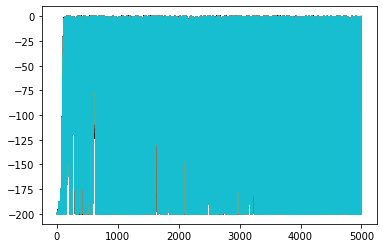

In [8]:
def store_sample(s,a,r,d,info ,s2):
    ob_1 = np.reshape(s['observation'],(1,10))
    ac_1 = np.reshape(s['achieved_goal'],(1,3))
    de_1 = np.reshape(s['desired_goal'],(1,3))
    ob_2 = np.reshape(s2['observation'],(1,10))
    ac_2 = np.reshape(s2['achieved_goal'],(1,3))
    de_2 = np.reshape(s2['desired_goal'],(1,3))
    s_1 = np.concatenate([ob_1,ac_1],axis=1)
    s2_1 = np.concatenate([ob_2,ac_1],axis=1)
    s_2 = np.concatenate([ob_1,de_1],axis=1)
    s2_2 = np.concatenate([ob_2,de_1],axis=1)
    substitute_goal = s['achieved_goal'].copy()
    substitute_reward = env.compute_reward(s['achieved_goal'], substitute_goal, info)

    replay_memory.append((s_2,a,r,d,s2_2))
    replay_memory.append((s_1,a,substitute_reward,True,s2_1))

def stg(s):
    #print(len(s))
    ob_1 = np.reshape(s['observation'],(1,10))
    de_1 = np.reshape(s['desired_goal'],(1,3))
    return np.concatenate([ob_1,de_1],axis=1)

sess = tf.Session()
ac = actor(state_size, action_size, action_bound, sess)
cr = critic(state_size, action_size, action_bound, sess)
s = env.reset()

noice = OrnsteinUhlenbeckActionNoise(mu=np.zeros(action_size))

sess.run(tf.global_variables_initializer())
#save_path = 'DDPG.ckpt'
saver = tf.train.Saver()
#saver = tf.train.Saver()
replay_memory = deque(maxlen = 100000)
max_ep = 5000
max_ep_len = 200
gamma = 0.99
R_graph = deque(maxlen = 10)
R_graph_= []
#cr.first_up()
#ac.first_up()

for ii in range(max_ep):
    s = env.reset()
    #print(s.shape)
    #s = s[np.newaxis, :]
    R,r = 0,0
    for kk in range(max_ep_len):
        #print('++')
        ss = stg(s)
        a = ac.get_action(ss)
        #print(a)
        a += noice()
        #print(a)
        a=a[0]
        #env.render()
        s2,r,d,info=env.step(a)
        #print(s2)
        #s2=s2[np.newaxis, :]
        r_2 = r
        r=r
        store_sample(s,a,r,d,info,s2)
        #replay_memory.append((s,a,r,d,s2))
        s = s2
        R += r_2
        if batch_size < len(replay_memory):
            minibatch = random.sample(replay_memory, batch_size)
            s_batch, a_batch,r_batch, d_batch, s2_batch = [], [], [], [], []
            for s_, a_, r_, d_, s2_ in minibatch:
                s_batch.append(s_)
                s2_batch.append(s2_)
                a_batch.append(a_)
                r_batch.append(r_)
                d_batch.append(d_)
            s_batch = np.squeeze(np.array(s_batch),axis=1)
            s2_batch = np.squeeze(np.array(s2_batch),axis=1)
            r_batch=np.reshape(np.array(r_batch),(len(r_batch),1))
            a_batch=np.array(a_batch)
            d_batch=np.reshape(np.array(d_batch)+0,(128,1))
            #print(d_batch)
            a2 = ac.get_action_target(s2_batch)
            #print(a2.shape)
            v2 = cr.get_val_target(s2_batch,a2)
            #print(v2.shape)
            #for
            tar= np.zeros((128,1))
            for o in range(128):
                tar[o] = r_batch[o] + gamma * v2[o]
            #print(tar.shape)
            cr.train_critic(s_batch,a_batch,tar)
            #print(loss_cr)

            a_out = ac.get_action(s_batch)
            kk = cr.get_grad(s_batch,a_out)[0]
            #print(kk)
            ac.train_actor(s_batch, kk)
            cr.update_critic_target_net()
            ac.update_target_tar()
            #exit()
    R_graph.append(R)
    R_graph_.append(R)

    #print(ii, R)
    if ii % 20 ==0 :
        saver.save(sess, 'model/kk')
    print(ii, R, np.mean(np.array(R_graph)), np.max(np.array(R_graph)))
    if (ii+1) % 100:
        plt.plot(np.array(R_graph_))